### 01_ Early detection system for acute respiratory diseases for the departments of Peru

#### 0. Authors - Autoras
<br>
Mónica Lozada - monica.lozada@etu.unige.ch  & Carolina Saavedra - carolinasaavedra01@gmail.com 
<br>

#### 1. Title - Titulo 
<br>
01_ Early detection system for acute respiratory diseases for the departments of Peru
01_ Sistema de detección temprana para casos de enfermedades respiratorias graves por departamentos del Perú
<br>

#### 2.  Purpose - Propósito
<br>
We handle raw official data and, through a random forest mechanism, we implemented an early detection system for acute respiratory diseases in the departments of Peru.

#### 3. Packages to install - Instalación de paquetes
<br>
Before to run the code you must need install 'pip install openpyxl'; 'pip install seaborn', 'pip install scikit-learn'. 
<br>

#### 4. Documentation - Documentación

- [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)  
- [Using machine learning for early detection of chronic obstructive pulmonary disease: a narrative review](https://respiratory-research.biomedcentral.com/articles/10.1186/s12931-024-02960-6)  
- [Machine Learning Models for Predicting the Occurrence of Respiratory Diseases Using Climatic and Air-Pollution Factors](https://pmc.ncbi.nlm.nih.gov/articles/PMC9149237/)  
- [Detecting respiratory diseases using machine learning-based model for pulmonary audio data](https://www.sciencedirect.com/science/article/pii/S111001682401425X)  


#### 5. Data - Datos
- [OBSERVATORIO DE CLIMA Y SALUD - Ministerio de Salud](https://app7.dge.gob.pe/maps/clima-salud/)  
- [Population - Instituto Nacional de Estadística e Informática (INEI)](https://censo2017.inei.gob.pe/)

#### 01. Packages

In [1]:
import pandas as pd
import os
from pathlib import Path
import shutil
from IPython.display import FileLink
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import seaborn as sns
from datetime import datetime

C:\Users\CAROLINA\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


#### 02. Directory (Change the route according your files organization) - Directorio (Cambia la ruta según la organización de tus archivos)

In [2]:
#base_route = Path(r'C:/Users/monic/CODING_101/TheWhyHub/EnfermedadesRespiratorias/BasesEnfermedadRespiratoriaAguda') 
base_route = Path(r"C:/Users/CAROLINA/Documents/02_GitHub/Machine_Learning/Moni_Caro/01_Bases")
#route_population = Path(r"C:/Users/monic/CODING_101/TheWhyHub/EnfermedadesRespiratorias/DataPoblacional2017.xlsx")
route_population = Path(r"C:/Users/CAROLINA/Documents/02_GitHub/Machine_Learning/Moni_Caro/01_Bases/DataPoblacional2017.xlsx")
years = list(range(2017, 2026))
df_total = pd.DataFrame()

#### 03. Join database from 'Observatorio de Clima & Salud' - Construcción de la base de datos

In [3]:
# Loop over years
for year in years:
    year_folder = base_route / str(year)

    if not year_folder.exists():
        print(f"❌ Folder not found: {year_folder}")
        continue

    files = [f for f in year_folder.iterdir() if f.name.startswith("clima_departamento_") and f.suffix == ".xlsx"]
    print(f"📁 Year {year}: {len(files)} file(s) found.")

    for file in files:
        try:
            df = pd.read_excel(file)
            department = file.stem.replace("clima_departamento_", "")
            df["Departamento"] = department  # Overwrites if exists
            df_total = pd.concat([df_total, df], ignore_index=True)
            print(f"✅ Loaded: {file.name} ({df.shape[0]} rows)")
        except Exception as e:
            print(f"⚠️ Error reading {file}: {e}")

📁 Year 2017: 26 file(s) found.
✅ Loaded: clima_departamento_Amazonas.xlsx (52 rows)
✅ Loaded: clima_departamento_Ancash.xlsx (52 rows)
✅ Loaded: clima_departamento_Apurimac.xlsx (52 rows)
✅ Loaded: clima_departamento_Arequipa.xlsx (52 rows)
✅ Loaded: clima_departamento_Ayacucho.xlsx (52 rows)
✅ Loaded: clima_departamento_Cajamarca.xlsx (52 rows)
✅ Loaded: clima_departamento_Callao.xlsx (52 rows)
✅ Loaded: clima_departamento_Cusco.xlsx (52 rows)
✅ Loaded: clima_departamento_Huancavelica.xlsx (52 rows)
✅ Loaded: clima_departamento_Huanuco.xlsx (52 rows)
✅ Loaded: clima_departamento_Ica.xlsx (52 rows)
✅ Loaded: clima_departamento_Junin.xlsx (52 rows)
✅ Loaded: clima_departamento_LaLibertad.xlsx (52 rows)
✅ Loaded: clima_departamento_Lambayeque.xlsx (52 rows)
✅ Loaded: clima_departamento_Lima.xlsx (52 rows)
✅ Loaded: clima_departamento_LimaMetropolitana.xlsx (52 rows)
✅ Loaded: clima_departamento_Loreto.xlsx (52 rows)
✅ Loaded: clima_departamento_MadreDios.xlsx (52 rows)
✅ Loaded: clima_de

✅ Loaded: clima_departamento_Ucayali.xlsx (52 rows)
📁 Year 2023: 26 file(s) found.
✅ Loaded: clima_departamento_Amazonas.xlsx (52 rows)
✅ Loaded: clima_departamento_Ancash.xlsx (52 rows)
✅ Loaded: clima_departamento_Apurimac.xlsx (52 rows)
✅ Loaded: clima_departamento_Arequipa.xlsx (52 rows)
✅ Loaded: clima_departamento_Ayacucho.xlsx (52 rows)
✅ Loaded: clima_departamento_Cajamarca.xlsx (52 rows)
✅ Loaded: clima_departamento_Callao.xlsx (52 rows)
✅ Loaded: clima_departamento_Cusco.xlsx (52 rows)
✅ Loaded: clima_departamento_Huancavelica.xlsx (52 rows)
✅ Loaded: clima_departamento_Huanuco.xlsx (52 rows)
✅ Loaded: clima_departamento_Ica.xlsx (52 rows)
✅ Loaded: clima_departamento_Junin.xlsx (52 rows)
✅ Loaded: clima_departamento_LaLibertad.xlsx (52 rows)
✅ Loaded: clima_departamento_Lambayeque.xlsx (52 rows)
✅ Loaded: clima_departamento_Lima.xlsx (52 rows)
✅ Loaded: clima_departamento_LimaMetropolitana.xlsx (52 rows)
✅ Loaded: clima_departamento_Loreto.xlsx (52 rows)
✅ Loaded: clima_depa

In [4]:
df_total.to_excel('Acute_Respiratory_Disease_National_2017_2025_SLA.xlsx', index=False)
print("✅ File exported successfully")
print(df_total.shape)

<ipython-input-4-19d5f7b4a128>:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_total.to_excel('Acute_Respiratory_Disease_National_2017_2025_SLA.xlsx', index=False)


✅ File exported successfully
(12220, 15)


In [5]:
print(df_total.head())

  Departamento  tmean  tmax  tmin  humr   ptot   Ano  Semana  tmean_clima  \
0     Amazonas   19.1  22.3  19.1  92.7  106.9  2017       1         19.7   
1     Amazonas   19.4  23.5  19.4  91.0   29.1  2017       2         19.8   
2     Amazonas   19.8  23.6  19.8  88.4   76.1  2017       3         19.7   
3     Amazonas   19.3  23.1  19.3  90.4   54.4  2017       4         19.7   
4     Amazonas   19.3  23.2  19.3  90.3   35.7  2017       5         19.8   

   tmax_clima  tmin_clima  humr_clima  ptot_clima  Tipo caso   Casos  
0        23.8        19.7        87.4        20.1  ira_total  1023.0  
1        23.9        19.8        87.1        19.0  ira_total  1097.0  
2        23.7        19.7        87.3        22.2  ira_total  1017.0  
3        23.8        19.7        87.6        16.5  ira_total   733.0  
4        23.9        19.8        88.2        17.8  ira_total   700.0  


In [6]:
rename_dict = {
    "Departamento": "Department",
    "Ano": "Year",
    "Semana": "Week",
    "Tipo caso": "Type_Case",
    "Casos": "Cases"
}

df_total = df_total.rename(columns=rename_dict)

print("✅ Columns renamed successfully.")
print("Current columns:", df_total.columns.tolist())

✅ Columns renamed successfully.
Current columns: ['Department', 'tmean', 'tmax', 'tmin', 'humr', 'ptot', 'Year', 'Week', 'tmean_clima', 'tmax_clima', 'tmin_clima', 'humr_clima', 'ptot_clima', 'Type_Case', 'Cases']


#### 04. Adding 2017 population from INEI to obtain Incidence per 1,000 habitants - Agregar datos poblacionales 2017 para calcular tasa de incidencia referencial por 1,000 habitantes

In [7]:
# Read population file
df_population = pd.read_excel(route_population)

# Rename columns to English
df_population = df_population.rename(columns={
    "Departamentos": "Department",
    "Poblacion": "Population"
})

print("✅ Population file columns renamed successfully.")
print(df_population.head())

# Create dictionary to map population by department
population_dict = df_population.set_index('Department')['Population'].to_dict()

# Add population column to df_total
df_total['Population'] = df_total['Department'].map(population_dict)
print(df_total["Population"].isnull().sum(), "departments without assigned population.")

# Remove rows with NaN
df_total = df_total.dropna()

# Add incidence rate column
df_total['Incidence_Rate'] = (df_total['Cases'] / df_total['Population']) * 10000
print(df_total['Incidence_Rate'].isnull().sum(), "rows without calculated incidence rate.")

# Update incidence rate avoiding division by zero
df_total['Incidence_Rate'] = (df_total['Cases'] / df_total['Population'].replace(0, np.nan)) * 1000
print("Columns in df_total:", df_total.columns.tolist())

# Export final DataFrame to Excel
output_file = 'Acute_Respiratory_Disease_National_2017_2025_with_Population.xlsx'
df_total.to_excel(output_file, index=False)
print("✅ File exported successfully:", output_file)

# Display download link
display(FileLink(output_file))

✅ Population file columns renamed successfully.
  Department  Population
0   Amazonas      379384
1     Ancash     1083519
2   Apurimac      405759
3   Arequipa     1382730
4   Ayacucho      616176
0 departments without assigned population.
0 rows without calculated incidence rate.
Columns in df_total: ['Department', 'tmean', 'tmax', 'tmin', 'humr', 'ptot', 'Year', 'Week', 'tmean_clima', 'tmax_clima', 'tmin_clima', 'humr_clima', 'ptot_clima', 'Type_Case', 'Cases', 'Population', 'Incidence_Rate']


<ipython-input-7-6264d3b899e8>:33: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_total.to_excel(output_file, index=False)


✅ File exported successfully: Acute_Respiratory_Disease_National_2017_2025_with_Population.xlsx


C:\Users\CAROLINA\Documents\02_GitHub\Machine_Learning\Moni_Caro\Acute_Respiratory_Disease_National_2017_2025_with_Population.xlsx

#### 05. Visualization of data - Vizualisación de los datos

#### 05.1. Plot normalized national incidence rate over years

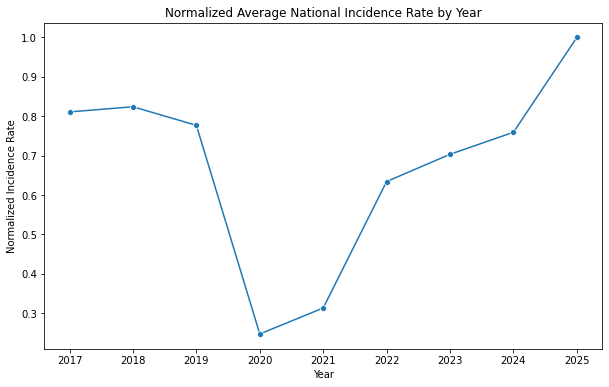

In [8]:
# Calculate average national incidence rate by year
national_incidence_rate = df_total.groupby('Year')['Incidence_Rate'].mean().reset_index()

# Create a column with Incidence_Rate normalized by the max value for each Department
df_total['Incidence_Rate_Normalized'] = (
    df_total.groupby('Department')['Incidence_Rate']
    .transform(lambda x: x / x.max())
)

# Normalize the national incidence rate by its maximum value
national_incidence_rate['Incidence_Rate_Normalized'] = (
    national_incidence_rate['Incidence_Rate'] / national_incidence_rate['Incidence_Rate'].max()
)

# Plot normalized national incidence rate over years
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=national_incidence_rate, 
    x='Year', 
    y='Incidence_Rate_Normalized', 
    marker='o'
)
plt.title('Normalized Average National Incidence Rate by Year')
plt.xlabel("Year")
plt.ylabel("Normalized Incidence Rate")
plt.show()

In [9]:
# Exclude pandemic years from the dataset
df_total = df_total[~df_total['Year'].isin([2020, 2021])]
print("✅ Pandemic years excluded. Current years:", df_total['Year'].unique())

✅ Pandemic years excluded. Current years: [2017 2018 2019 2022 2023 2024 2025]


In [10]:
# Group by Department and Year, then calculate correlation for each group
corr_by_dept_year = df_total.groupby(['Department', "Year"])[["Incidence_Rate_Normalized", 'tmean', 'humr']].corr()

# Unstack to get a DataFrame with MultiIndex
corr_by_dept_year = corr_by_dept_year.unstack()

# Get the average correlation of Incidence Rate with tmean and humr across all departments and years
avg_corr_inc_tmean = corr_by_dept_year.loc[:, ("Incidence_Rate_Normalized", 'tmean')].mean()
avg_corr_inc_humr = corr_by_dept_year.loc[:, ("Incidence_Rate_Normalized", 'humr')].mean()

print("📊 Average correlation between normalized incidence rate and tmean:", avg_corr_inc_tmean)
print("📊 Average correlation between normalized incidence rate and humr:", avg_corr_inc_humr)

📊 Average correlation between normalized incidence rate and tmean: -0.3983689872847845
📊 Average correlation between normalized incidence rate and humr: -0.29629602499774477


#### 05.2. Heatmap of incidence rate by department and year

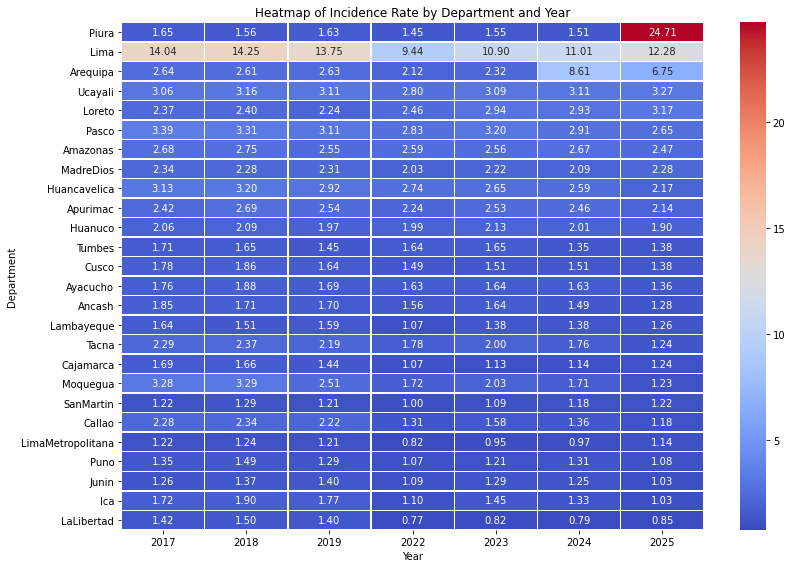

In [11]:
# Pivot table and sort
pivot = df_total.pivot_table(
    index='Department', 
    columns='Year', 
    values='Incidence_Rate', 
    aggfunc='mean'
)
pivot = pivot.sort_values(by=pivot.columns[-1], ascending=False)

# Configure heatmap with numerical values
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot,
    annot=True,
    cmap='coolwarm',
    vmin=pivot.min().min(),
    vmax=pivot.max().max(),
    fmt=".2f",       # Format annotations to 2 decimal places
    linewidths=0.5
)

plt.title('Heatmap of Incidence Rate by Department and Year')
plt.ylabel('Department')
plt.xlabel('Year')
plt.tight_layout()
plt.show()

#### 06. Random forest by department - Modelo de árbol causal por departamento

#### 06.1. First model evaluation


Processing department: Amazonas
Mean Squared Error: 0.02047038665814262
Mean Absolute Error: 0.11456271161404681


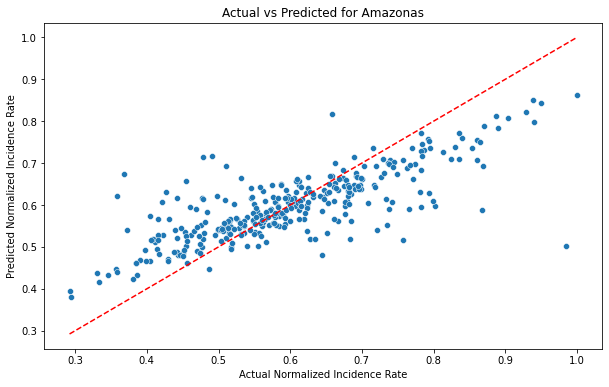


Processing department: Ancash
Mean Squared Error: 0.017124351479095114
Mean Absolute Error: 0.10156983370582544


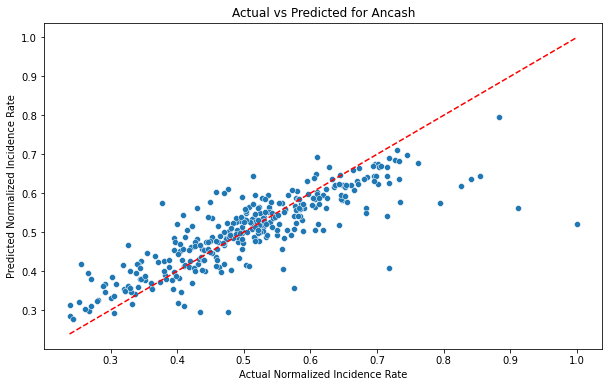


Processing department: Apurimac
Mean Squared Error: 0.018670284311662257
Mean Absolute Error: 0.11087569787040369


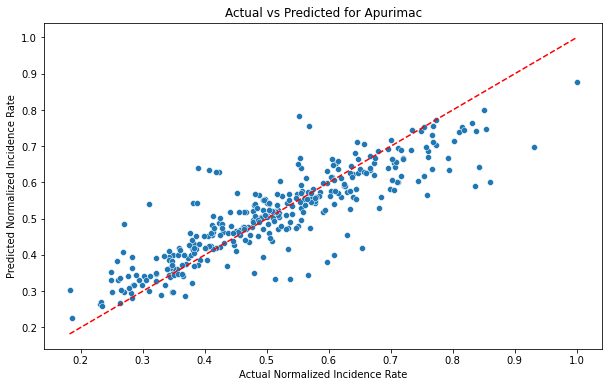


Processing department: Arequipa
Mean Squared Error: 0.02661329343143349
Mean Absolute Error: 0.12008649850102963


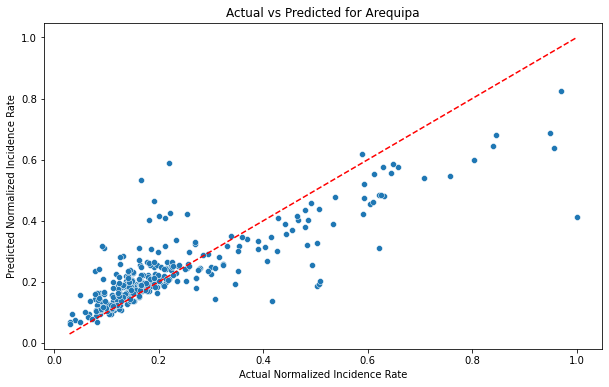


Processing department: Ayacucho
Mean Squared Error: 0.012883552375827018
Mean Absolute Error: 0.0802872141754283


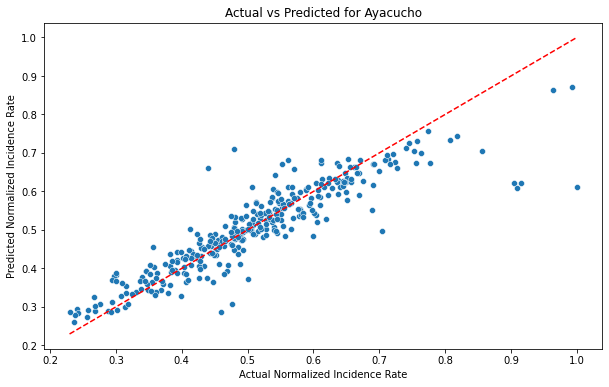


Processing department: Cajamarca
Mean Squared Error: 0.01791068325221889
Mean Absolute Error: 0.1050029583966538


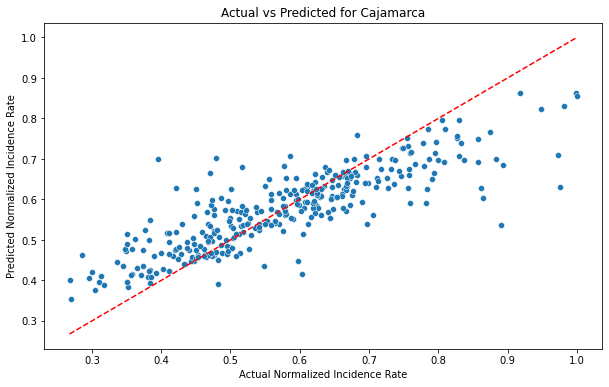


Processing department: Callao
Mean Squared Error: 0.017434584386440632
Mean Absolute Error: 0.10949154968549317


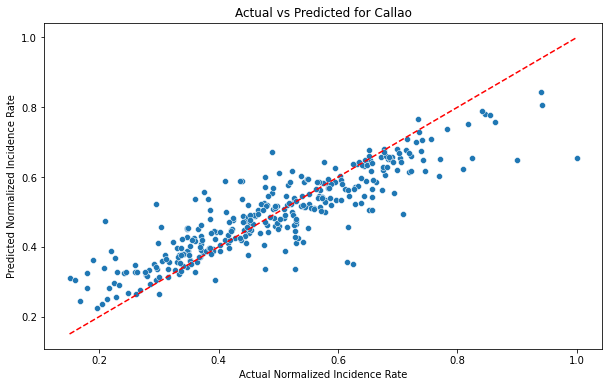


Processing department: Cusco
Mean Squared Error: 0.018196707408349104
Mean Absolute Error: 0.09985613186169998


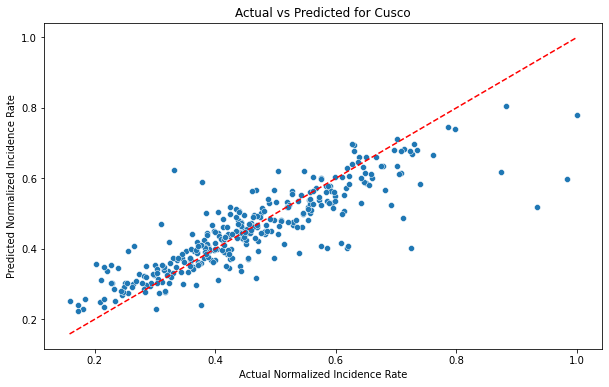


Processing department: Huancavelica
Mean Squared Error: 0.013921824031146954
Mean Absolute Error: 0.09644291819757182


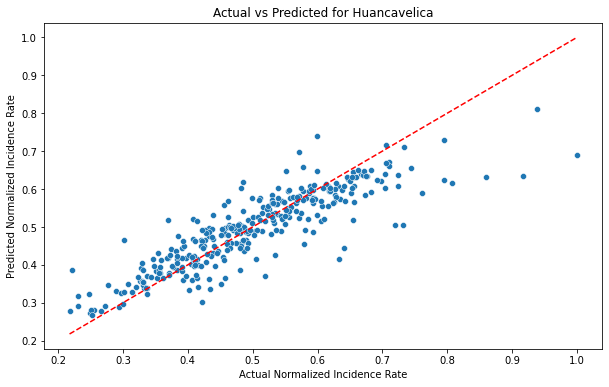


Processing department: Huanuco
Mean Squared Error: 0.018800970953712606
Mean Absolute Error: 0.11082955665436708


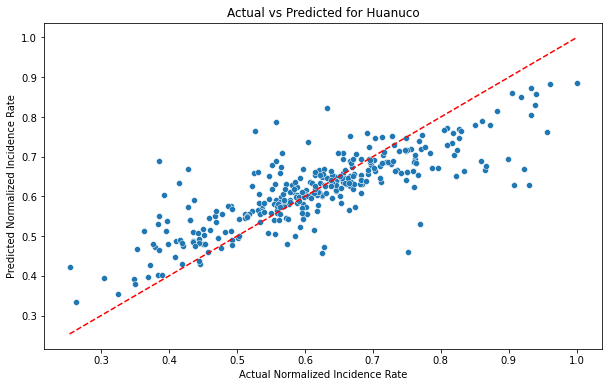


Processing department: Ica
Mean Squared Error: 0.022823914546953775
Mean Absolute Error: 0.11822380886915049


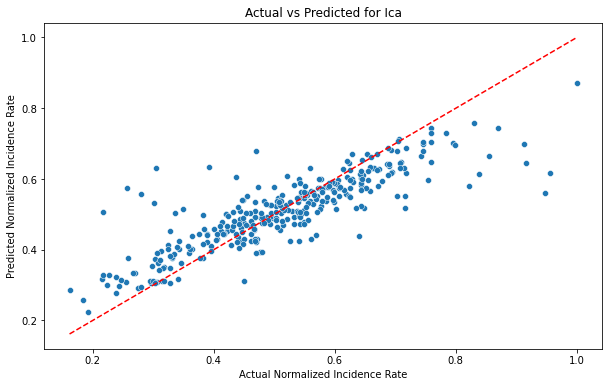


Processing department: Junin
Mean Squared Error: 0.021334671646748186
Mean Absolute Error: 0.12604665201899007


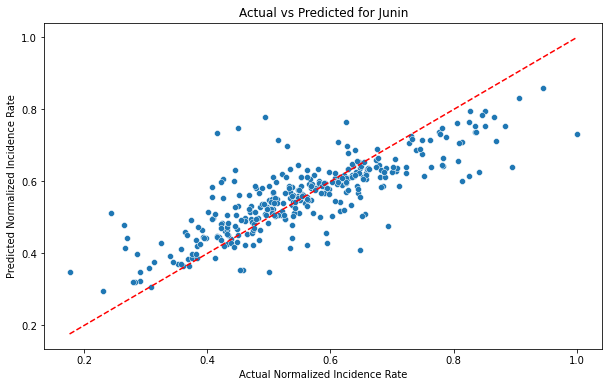


Processing department: LaLibertad
Mean Squared Error: 0.02516447012090971
Mean Absolute Error: 0.13233865670902598


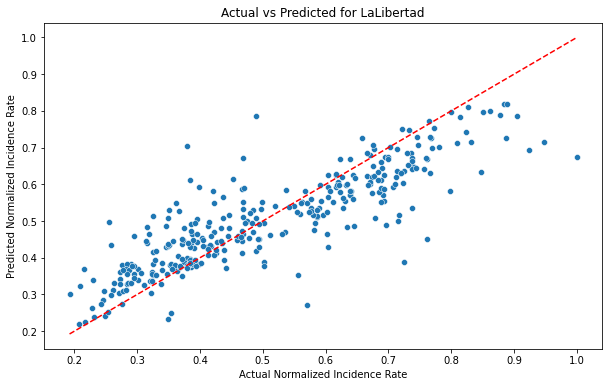


Processing department: Lambayeque
Mean Squared Error: 0.021103776264305766
Mean Absolute Error: 0.11566889560859478


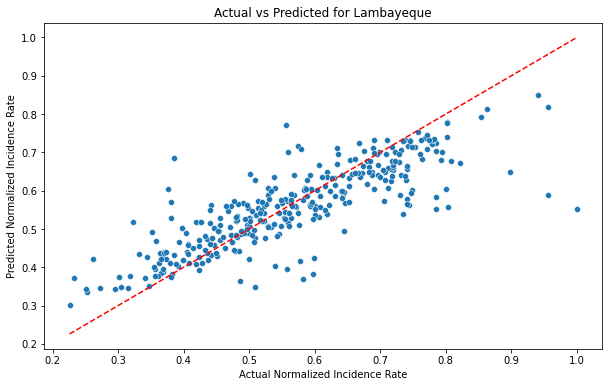


Processing department: Lima
Mean Squared Error: 0.015727484408643345
Mean Absolute Error: 0.09155574492404993


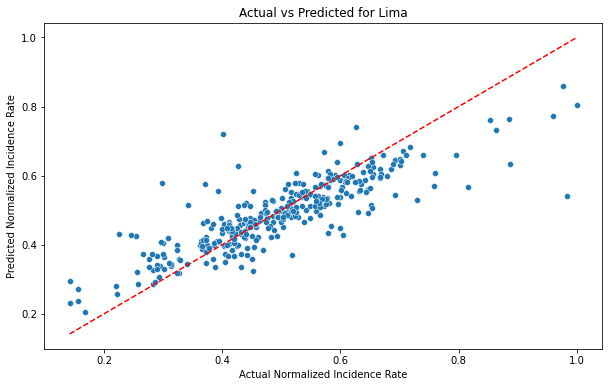


Processing department: LimaMetropolitana
Mean Squared Error: 0.011680840703204633
Mean Absolute Error: 0.07384942568388164


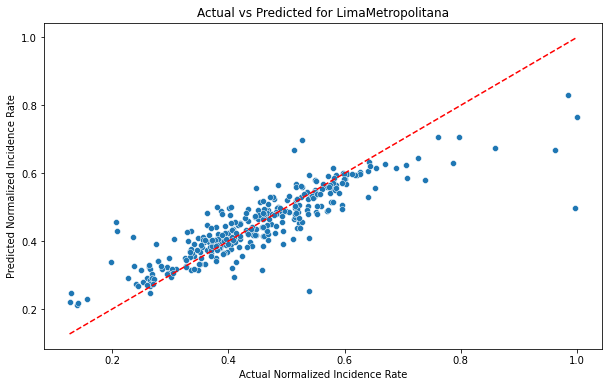


Processing department: Loreto
Mean Squared Error: 0.015094707060168003
Mean Absolute Error: 0.09364288093794786


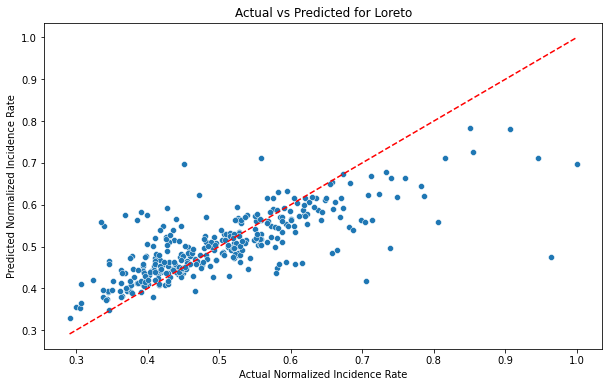


Processing department: MadreDios
Mean Squared Error: 0.017933214967614745
Mean Absolute Error: 0.10495931391730498


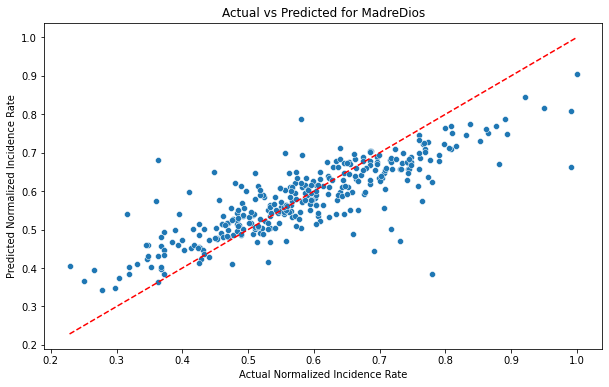


Processing department: Moquegua
Mean Squared Error: 0.03250847229628249
Mean Absolute Error: 0.14395030225217997


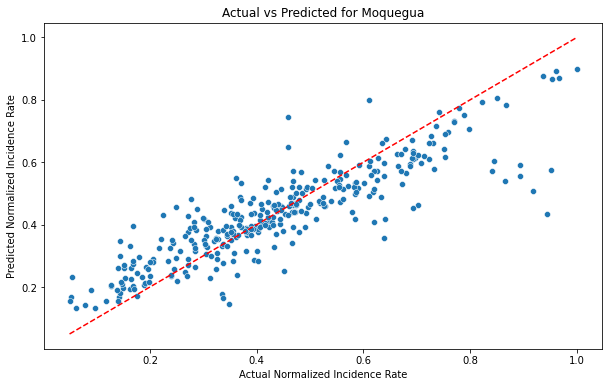


Processing department: Pasco
Mean Squared Error: 0.021840653511013646
Mean Absolute Error: 0.12019944267558227


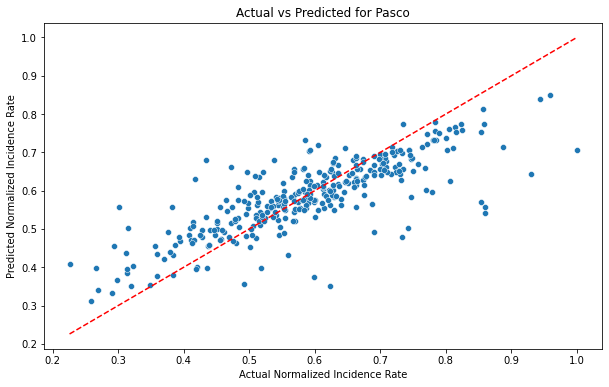


Processing department: Piura
Mean Squared Error: 0.003625911116449096
Mean Absolute Error: 0.010808060350150406


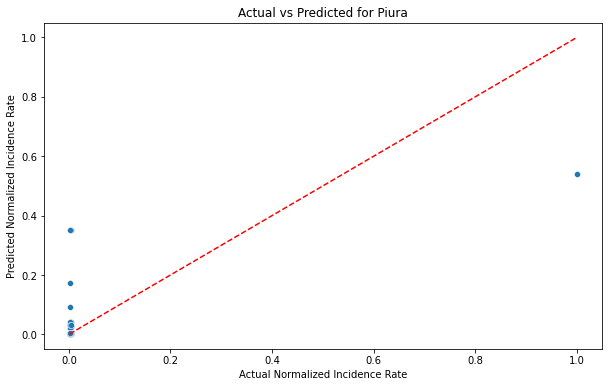


Processing department: Puno
Mean Squared Error: 0.011787058261393792
Mean Absolute Error: 0.07800104827035395


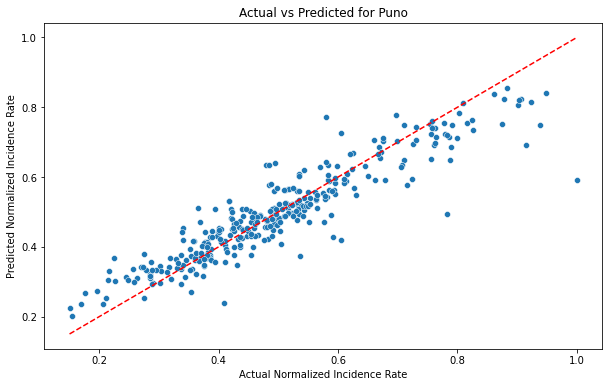


Processing department: SanMartin
Mean Squared Error: 0.020325968509406926
Mean Absolute Error: 0.10882772142968393


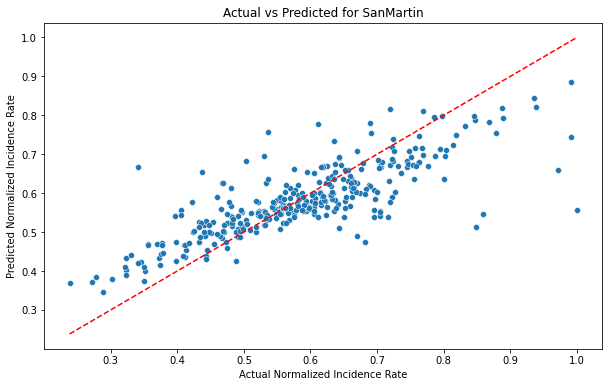


Processing department: Tacna
Mean Squared Error: 0.022585399211526858
Mean Absolute Error: 0.10846692242288898


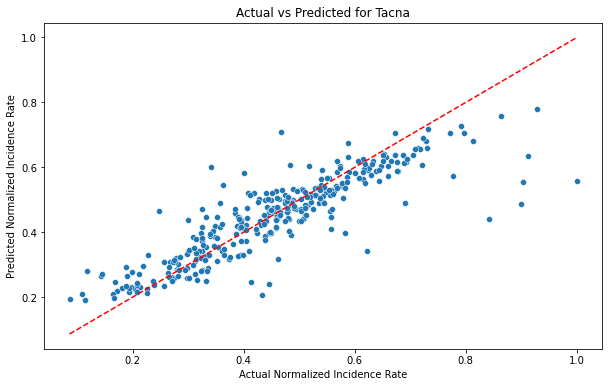


Processing department: Tumbes
Mean Squared Error: 0.01870459984291283
Mean Absolute Error: 0.10556061222391344


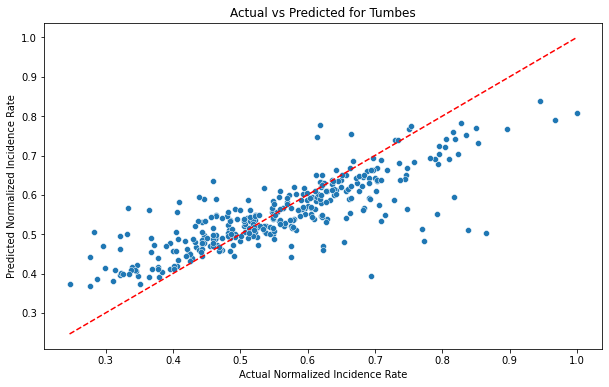


Processing department: Ucayali
Mean Squared Error: 0.01936113441285843
Mean Absolute Error: 0.10858506769876622


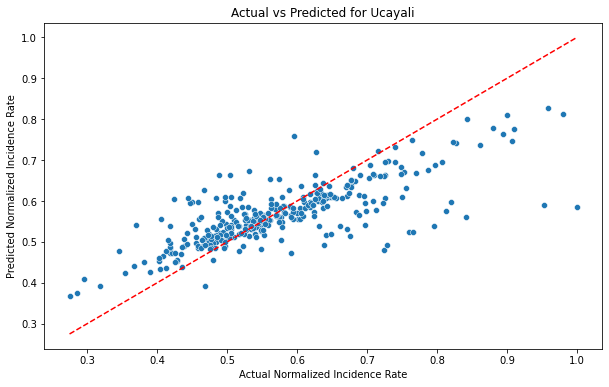

✅ df_all_preds created with predictions for all departments


In [12]:
def model_evaluation(model, X_train, y_train, X_test, y_test): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    
    return model, y_pred

def fit_random_forest(df_total):
    X = df_total[['tmean', 'humr']]
    y = df_total['Incidence_Rate_Normalized']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model, y_pred = model_evaluation(model, X_train, y_train, X_test, y_test)
    
    return model

def plot_model_predictions(df_total, model, region):
    X = df_total[['tmean', 'humr']]
    y = df_total['Incidence_Rate_Normalized']
    
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y, y=y_pred)
    plt.xlabel('Actual Normalized Incidence Rate')
    plt.ylabel('Predicted Normalized Incidence Rate')
    plt.title(f'Actual vs Predicted Normalized Incidence Rate for {region}')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Diagonal line
    plt.show()

def split_regional_data(df_total, departamento):
    return df_total[df_total['Department'] == department]
    
def split_and_process_data(df_total, department):
    df_department = df_total[df_total['Department'] == department]
    
    if df_department.empty:
        print(f"No data available for department: {department}")
        return None
    
    # Fit the model
    model = fit_random_forest(df_department)
    
    # Predictions
    X = df_department[['tmean', 'humr']]
    y_pred = model.predict(X)
    
    # Build df_preds for this department
    df_preds = df_department.copy()
    df_preds['Predicted_Rate'] = y_pred
    df_preds['Department'] = department
    
    # Optionally: plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=df_preds['Incidence_Rate_Normalized'], y=df_preds['Predicted_Rate'])
    plt.xlabel('Actual Normalized Incidence Rate')
    plt.ylabel('Predicted Normalized Incidence Rate')
    plt.title(f'Actual vs Predicted for {department}')
    plt.plot([df_preds['Incidence_Rate_Normalized'].min(), df_preds['Incidence_Rate_Normalized'].max()],
             [df_preds['Incidence_Rate_Normalized'].min(), df_preds['Incidence_Rate_Normalized'].max()],
             color='red', linestyle='--')
    plt.show()
    
    return df_preds

# Loop over all departments and collect predictions
all_preds = []
for department in df_total['Department'].unique():
    print(f"\nProcessing department: {department}")
    df_preds_dept = split_and_process_data(df_total, department)
    if df_preds_dept is not None:
        all_preds.append(df_preds_dept)

# Concatenate all departments into a single national DataFrame
df_all_preds = pd.concat(all_preds, ignore_index=True)
print("✅ df_all_preds created with predictions for all departments")

In [13]:
# Find indices and values in Incidence_Rate_Normalized where there are NaNs
nan_indices = df_total[df_total['Incidence_Rate_Normalized'].isna()].index
nan_values = df_total.loc[nan_indices, 'Incidence_Rate_Normalized']

print("🔎 Indices with NaN in Incidence_Rate_Normalized:", nan_indices.tolist())
print("⚠️ Number of NaN values:", nan_values.shape[0])

if not nan_indices.empty:
    print("📋 Sample rows with NaN values:\n", df_total.loc[nan_indices])
else:
    print("✅ No NaN values found in Incidence_Rate_Normalized.")

🔎 Indices with NaN in Incidence_Rate_Normalized: []
⚠️ Number of NaN values: 0
✅ No NaN values found in Incidence_Rate_Normalized.


#### 07. Early Detection System - Sistema de Detección temprano

Mean Predicted Rate (national): 0.49

🚨 Alert Levels Summary by Department:
Alert_Level        Critical  High  Low  Medium
Department                                    
Amazonas                 18   287    0      30
Ancash                    1   191    0     143
Apurimac                 14   172    1     148
Arequipa                  1    16  237      81
Ayacucho                  4   179    0     152
Cajamarca                16   239    0      80
Callao                    8   158    3     166
Cusco                     3   111    6     215
Huancavelica              2   173    0     160
Huanuco                  30   267    0      38
Ica                       4   193    1     137
Junin                    15   237    0      83
LaLibertad               15   154    5     161
Lambayeque               10   231    0      94
Lima                      6   158    3     168
LimaMetropolitana         2   105    5     223
Loreto                    2   168    0     165
MadreDios                16   2

<ipython-input-14-f4e9cee0e1ab>:26: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.7' currently installed).
  df_all_preds.to_excel(output_file, index=False)



✅ Predictions with alert levels saved to Predicted_Rates_With_Alerts.xlsx


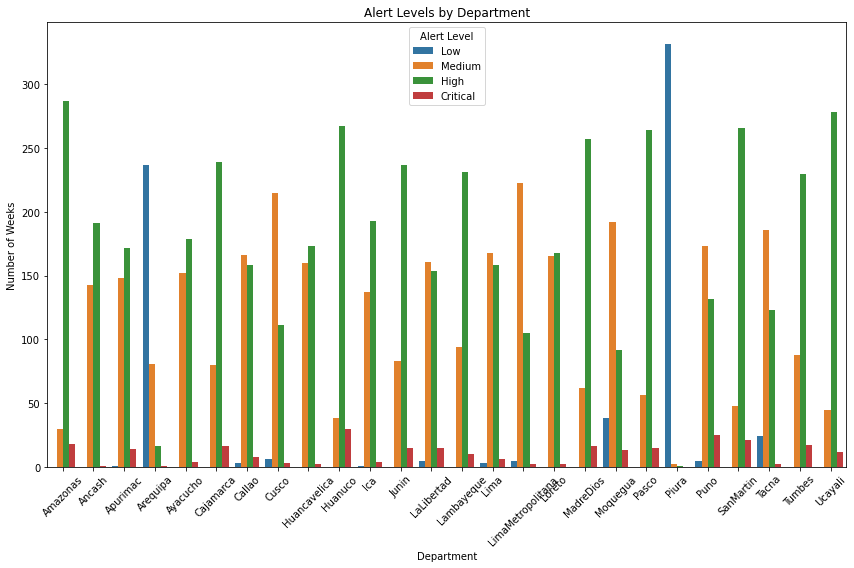

In [14]:
# Calculate mean predicted rate (national)
mean_rate = df_all_preds['Predicted_Rate'].mean()
print(f"Mean Predicted Rate (national): {mean_rate:.2f}")

# Define classification function
def classify_alert(rate, mean_rate):
    if rate > 1.5 * mean_rate:
        return "Critical"
    elif rate > mean_rate:
        return "High"
    elif rate > 0.5 * mean_rate:
        return "Medium"
    else:
        return "Low"

# Apply the classification to all predictions
df_all_preds['Alert_Level'] = df_all_preds['Predicted_Rate'].apply(lambda x: classify_alert(x, mean_rate))

# Quick summary of alert levels by department
alert_summary = df_all_preds.groupby('Department')['Alert_Level'].value_counts().unstack(fill_value=0)
print("\n🚨 Alert Levels Summary by Department:")
print(alert_summary)

# Save the national predictions with alert levels
output_file = "Predicted_Rates_With_Alerts.xlsx"
df_all_preds.to_excel(output_file, index=False)
print(f"\n✅ Predictions with alert levels saved to {output_file}")

# Visualize alerts
plt.figure(figsize=(12, 8))
sns.countplot(data=df_all_preds, x='Department', hue='Alert_Level',
              order=df_all_preds['Department'].unique(),
              hue_order=['Low','Medium','High','Critical'])
plt.xticks(rotation=45)
plt.title("Alert Levels by Department")
plt.ylabel("Number of Weeks")
plt.xlabel("Department")
plt.legend(title="Alert Level")
plt.tight_layout()
plt.show()

In [15]:
output_csv = "Predicted_Rates_With_Alerts.csv"
df_all_preds.to_csv(output_csv, index=False)
print(f"✅ Predictions with alert levels saved to CSV: {output_csv}")

✅ Predictions with alert levels saved to CSV: Predicted_Rates_With_Alerts.csv
